### TrOCRでの入力画像のリサイズについて
TrOCRでは入力画像のアスペクト比を無視して384x384にリサイズしているため、縦長、横長の画像は押しつぶされる形でリサイズされている。

### 新しいリサイズ方法
1. 画像を幅64でアスペクト比を保ったまま、列画像をリサイズする
2. 高さを指定のサイズ（例: 384）ごとに画像を分割して、横に並べていく。
3. 余った部分は黒で塗りつぶす。

これによって、アスペクト比を保ったまま、縦長や横長の画像を正方形にリサイズすることができる。
また、幅を16や32の倍数の64にしたことで、パッチに分けた際に、正しく列ごとに分割されることとなり、モデルが迷うことがなくなる。

元画像サイズ: (197, 1921)
使用した画像: ../data/column_dataset/train/images/100249376/100249376_00053_1/100249376_00053_1_column_001.jpg
ランダム画像の処理テスト...
処理後の画像サイズ: (384, 384)


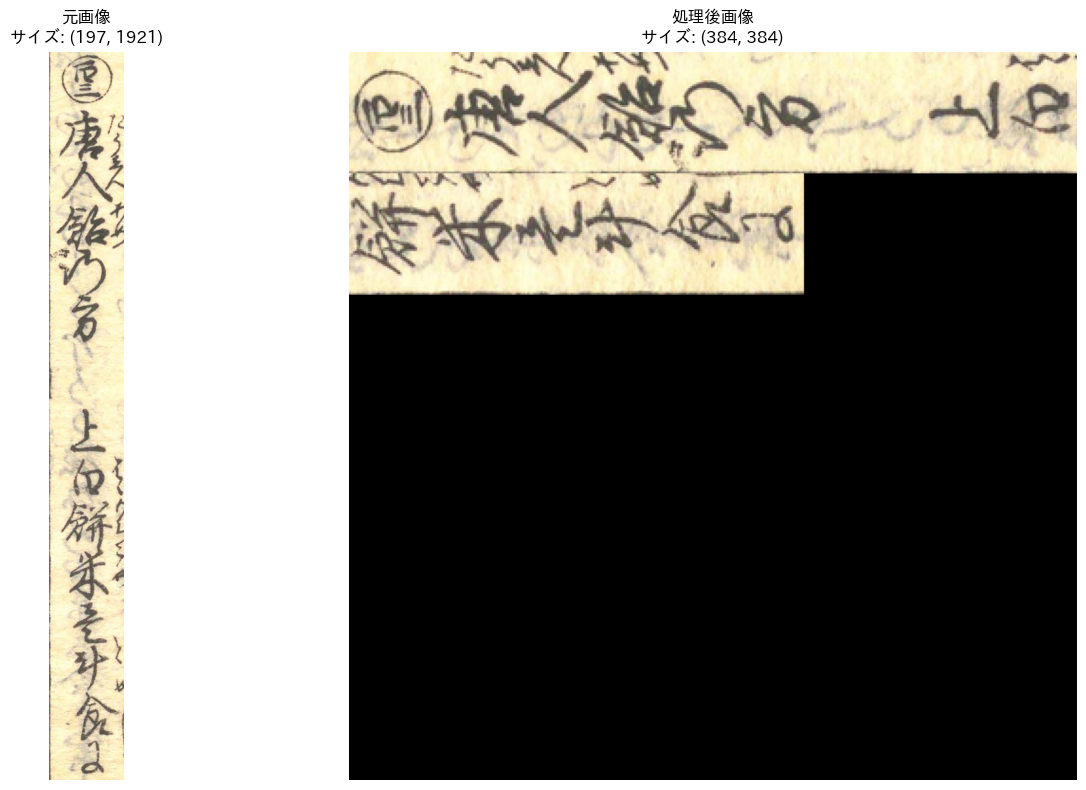

In [1]:
# 作成した関数のテストと可視化
import sys
sys.path.append('../src')

from utils.image_resize import process_column_image_for_trocr, get_random_column_image
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from PIL import Image


# 元画像
random_image_path = get_random_column_image()
#random_image_path = "../data/column_dataset/train/images/100249371/100249371_00002_2/100249371_00002_2_column_001.jpg"
original_image = Image.open(random_image_path).convert("RGB")
print(f"元画像サイズ: {original_image.size}")
print(f"使用した画像: {random_image_path}")

# ランダムに画像を選択して処理
print("ランダム画像の処理テスト...")
processed_image = process_column_image_for_trocr(image_path=random_image_path)
print(f"処理後の画像サイズ: {processed_image.size}")

# 可視化
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# 元画像
axes[0].imshow(original_image)
axes[0].set_title(f"元画像\nサイズ: {original_image.size}")
axes[0].axis('off')

# 処理後画像
axes[1].imshow(processed_image)
axes[1].set_title(f"処理後画像\nサイズ: {processed_image.size}")
axes[1].axis('off')

plt.tight_layout()
plt.show()


パラメータ変更テスト...
Using random image: ../data/column_dataset/train/images/200021802/200021802_00051_2/200021802_00051_2_column_009.jpg
Using random image: ../data/column_dataset/train/images/200008316/200008316_00098_1/200008316_00098_1_column_011.jpg
Using random image: ../data/column_dataset/train/images/200008003/200008003_00023_2/200008003_00023_2_column_006.jpg


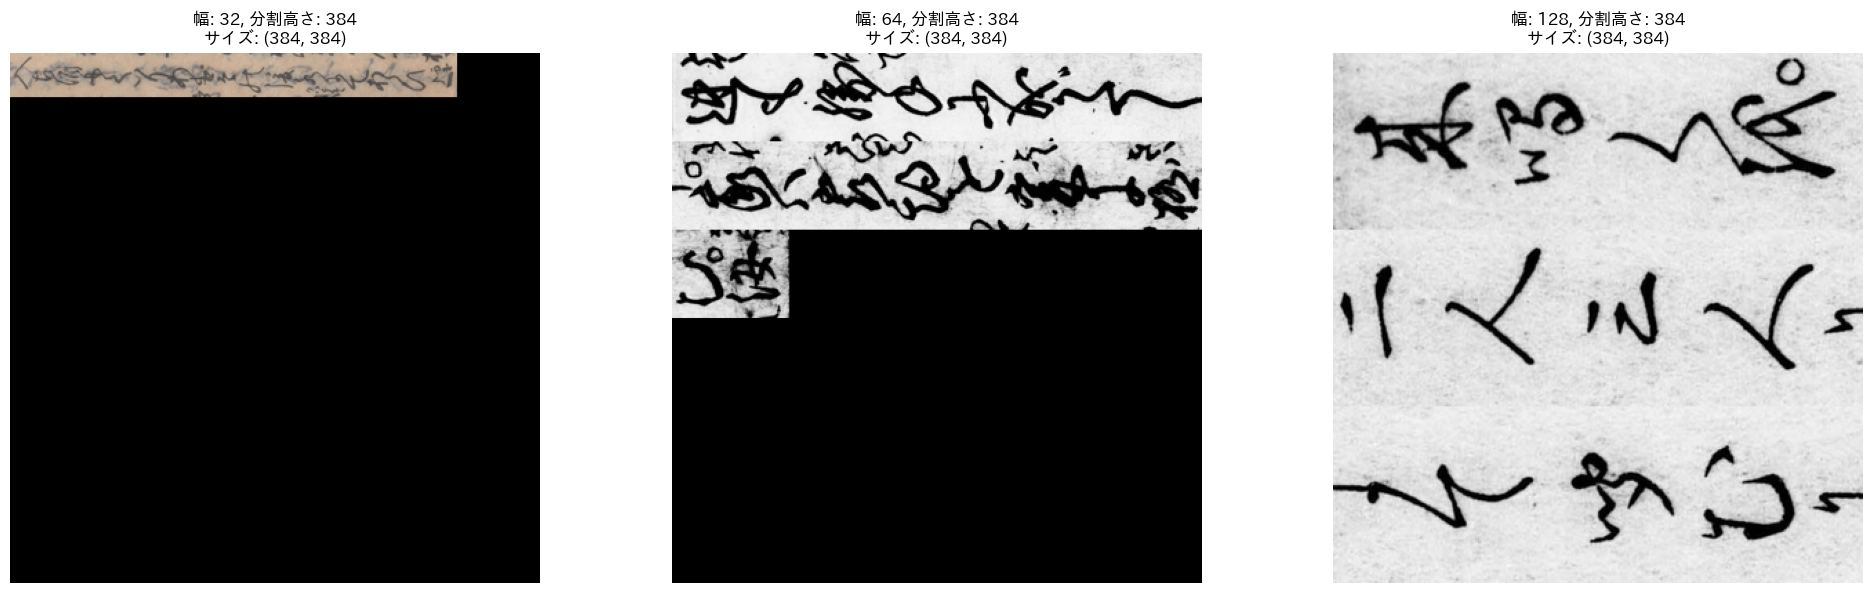

In [2]:
# パラメータを変更したテスト
print("パラメータ変更テスト...")

# 異なるパラメータでテスト
test_cases = [
    {"target_width": 32, "segment_height": 384},
    {"target_width": 64, "segment_height": 384},
    {"target_width": 128, "segment_height": 384},
]

fig, axes = plt.subplots(1, len(test_cases), figsize=(20, 6))

for i, params in enumerate(test_cases):
    processed_img = process_column_image_for_trocr(**params)
    
    axes[i].imshow(processed_img)
    axes[i].set_title(f"幅: {params['target_width']}, 分割高さ: {params['segment_height']}\nサイズ: {processed_img.size}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


処理ステップの詳細可視化...


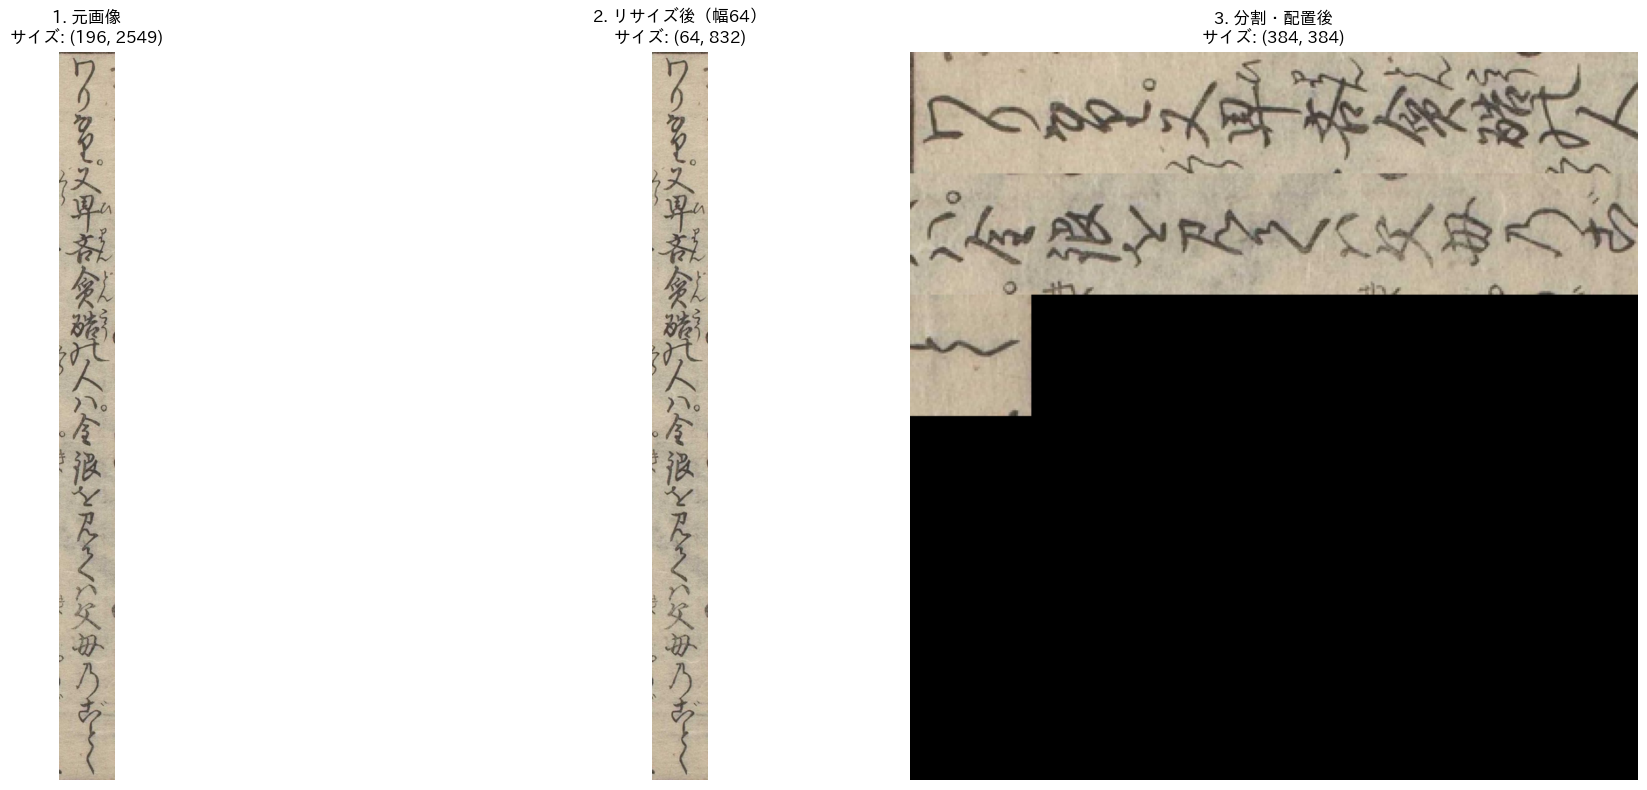

使用した画像: ../data/column_dataset/train/images/200014740/200014740_00090_1/200014740_00090_1_column_010.jpg
アスペクト比変化: 13.005 → 13.000
分割数: 3
最終キャンバスサイズ: (384, 384)


In [15]:
# 処理ステップの詳細可視化
print("処理ステップの詳細可視化...")

# 特定の画像を選んで処理ステップを可視化
image_path = get_random_column_image()
original = Image.open(image_path).convert("RGB")

# ステップ1: リサイズ
from utils.image_resize import resize_preserve_aspect_ratio, split_and_arrange_image

resized = resize_preserve_aspect_ratio(original, target_width=64)

# ステップ2: 分割・配置
final = split_and_arrange_image(resized, segment_height=384)

# 可視化
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].imshow(original)
axes[0].set_title(f"1. 元画像\nサイズ: {original.size}")
axes[0].axis('off')

axes[1].imshow(resized)
axes[1].set_title(f"2. リサイズ後（幅64）\nサイズ: {resized.size}")
axes[1].axis('off')

axes[2].imshow(final)
axes[2].set_title(f"3. 分割・配置後\nサイズ: {final.size}")
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"使用した画像: {image_path}")
print(f"アスペクト比変化: {original.size[1]/original.size[0]:.3f} → {resized.size[1]/resized.size[0]:.3f}")
print(f"分割数: {(resized.size[1] + 384 - 1) // 384}")
print(f"最終キャンバスサイズ: {final.size}")
